## 1-11. 프로젝트 (1) load_digits : 손글씨를 분류해 봅시다

In [5]:
import sklearn

print(sklearn.__version__)

1.0


### (1) 필요한 모듈 import하기

In [4]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

### (2) 데이터 준비

load_digits 메서드를 사용합니다.

In [22]:
digits = load_digits() #데이터를 준비하였다.

In [24]:
print(dir(digits))
#어떤 메소드가 있는지 알아보았다.

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']


### (3) 데이터 이해하기

지피지기면 백전불태! 다루어야 할 데이터를 자세히 살펴봅시다.<br>

* Feature Data 지정하기<br>
* Label Data 지정하기<br>
* Target Names 출력해 보기<br>
* 데이터 Describe 해 보기

In [31]:
print(digits_data.shape)

(1797, 64)


1797개의 데이터가  각각 64개의 정보를 담고 있다.

In [30]:
print(digits_label.shape)

(1797,)


In [73]:
digits_data = digits.data  #Feature Data 지정하기
digits_label = digits.target # Label Data 지정하기
print(digits.target_names) #Target Names 출력해보기
print(digits.DESCR) #데이터 Describe 해보기

[0 1 2 3 4 5 6 7 8 9]
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels a

### (4) train, test 데이터 분리

모델 학습과 테스트용 문제지와 정답지를 준비해 봅시다.  
X_train, X_test, y_train, y_test를 생성하는 방법을 참고해 보세요.

In [84]:
X_train, X_test, y_train, y_test = train_test_split(digits_data,
                                                    digits_label,
                                                    test_size=0.2,
                                                    random_state=7)
#random_state 가 고정되면 코드가 잘 되고 있는지 알기 편하다.
print('X_train 개수: ', len(X_train),', X_test 개수: ', len(X_test))

X_train 개수:  1437 , X_test 개수:  360


### (5) 다양한 모델로 학습시켜보기

학습데이터 X_train, y_train 을 활용해 분류기 모델을 만들어 봅시다. 어떤 모델이 가장 좋은 성능을 보일까요?

1.Decision Tree 사용해 보기

In [51]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.81      0.81      0.81        42
           2       0.79      0.82      0.80        40
           3       0.79      0.91      0.85        34
           4       0.83      0.95      0.89        37
           5       0.90      0.96      0.93        28
           6       0.84      0.93      0.88        28
           7       0.96      0.82      0.89        33
           8       0.88      0.65      0.75        43
           9       0.78      0.78      0.78        32

    accuracy                           0.86       360
   macro avg       0.86      0.86      0.86       360
weighted avg       0.86      0.86      0.85       360



In [50]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8555555555555555

약 86%의 정확도를 가진다.

2.Random Forest 사용해 보기

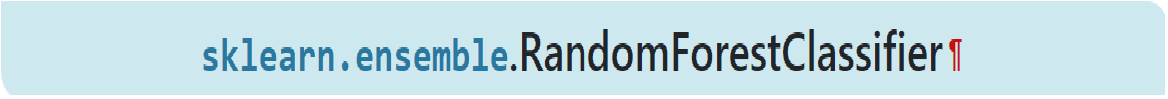

In [75]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.93      1.00      0.97        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       0.93      1.00      0.96        37
           5       0.90      0.96      0.93        28
           6       1.00      0.96      0.98        28
           7       0.94      0.97      0.96        33
           8       1.00      0.84      0.91        43
           9       0.94      0.94      0.94        32

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.97      0.96      0.96       360



약 96퍼센트의 정확도를 가진다.

3.SVM 사용해 보기 (Support Vector Machine)

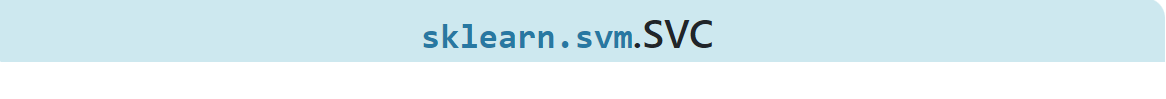

In [57]:
from sklearn import svm
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      1.00      0.98        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        37
           5       0.93      1.00      0.97        28
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        33
           8       1.00      0.93      0.96        43
           9       1.00      0.97      0.98        32

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



약 99퍼센트의 정확도를 가진다.

 4. SGD Classifier 사용해 보기

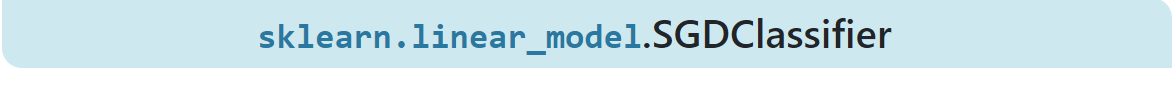

In [61]:
from sklearn.linear_model import SGDClassifier
sgdc_model = SGDClassifier(random_state=32)
sgdc_model.fit(X_train, y_train)
y_pred = sgdc_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.85      0.95      0.90        42
           2       0.98      1.00      0.99        40
           3       0.89      0.94      0.91        34
           4       1.00      0.97      0.99        37
           5       0.93      1.00      0.97        28
           6       0.96      0.93      0.95        28
           7       0.97      0.97      0.97        33
           8       0.88      0.88      0.88        43
           9       0.96      0.72      0.82        32

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.94      0.94      0.94       360



약 94퍼센트의 정확도를 가진다.

5.Logistic Regression 사용해 보기

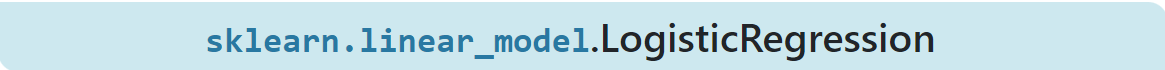

In [68]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter=10000)
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      0.95      0.95        42
           2       0.98      1.00      0.99        40
           3       0.94      0.97      0.96        34
           4       1.00      1.00      1.00        37
           5       0.79      0.96      0.87        28
           6       1.00      0.96      0.98        28
           7       0.94      0.97      0.96        33
           8       0.92      0.81      0.86        43
           9       0.97      0.88      0.92        32

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



약 95퍼센트의 정확도를 가진다.

(6) 모델을 평가해 보기<br>

학습된 모델들의 테스트데이터 예측 결과를 어떻게 해석해야 할까요?<br>
모델의 성능을 평가하는 지표로는 무엇이 좋을까요?<br>
sklearn.metrics 에서 제공하는 평가지표 중 적절한 것을 선택해 보세요. 선택하신 이유도 설명해 주세요.

정확도는 전체 데이터 중 맞은 데이터 만 신경 쓰는 척도이지만
정확도가 높을 수록 좋은 학습모델이라고 할 수 있다.

학습모델의 정확도를 해석해보면<br>
Decision Tree : 0.86<br>
 RandomForest : 0.96<br>
 SVM :0.99<br>
 SGD Classifier :0.94<br>
 Logistic Regression :0.95<br>
 로 SVM이 가장 정확도가 높게  학습시킨다고 할 수 있다.
이번 자료는 손글씨를 분류하는 과정이기 때문에 아니라고 예상했던 폰트가 맞은건 별 문제가 되지 않는다. 하지만 반대의 경우
폰트를 맞을것이라고 생각하고 잘못 폰트를 분류하게 되면 큰일이 나게 된다.즉, 음성을 양성으로 판단하면 안된다.
따라서 sklearn.confusion matrix 평가지표중 Precision이 더 중요하다고 생각한다.

## 1-12. 프로젝트 (2) load_wine : 와인을 분류해 봅시다

### (1) 필요한 모듈 import하기

In [3]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

### (2) 데이터 준비

load_wine 메서드를 사용합니다.

In [67]:
wine = load_wine() #데이터를 준비하였다.

### (3) 데이터 이해하기

지피지기면 백전불태! 다루어야 할 데이터를 자세히 살펴봅시다.<br>

* Feature Data 지정하기<br>
* Label Data 지정하기<br>
* Target Names 출력해 보기<br>
* 데이터 Describe 해 보기

In [5]:
wine_data = wine.data  #Feature Data 지정하기
wine_label = wine.target # Label Data 지정하기
print(wine.target_names) #Target Names 출력해보기
print(wine.DESCR) #데이터 Describe 해보기

['class_0' 'class_1' 'class_2']
.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
   

### (4) train, test 데이터 분리

모델 학습과 테스트용 문제지와 정답지를 준비해 봅시다.  
X_train, X_test, y_train, y_test를 생성하는 방법을 참고해 보세요.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(wine_data,
                                                    wine_label,
                                                    test_size=0.2,
                                                    random_state=7)
#random_state 가 고정되면 코드가 잘 되고 있는지 알기 편하다.
print('X_train 개수: ', len(X_train),', X_test 개수: ', len(X_test))


X_train 개수:  142 , X_test 개수:  36


### (5) 다양한 모델로 학습시켜보기

학습데이터 X_train, y_train 을 활용해 분류기 모델을 만들어 봅시다. 어떤 모델이 가장 좋은 성능을 보일까요?

1.Decision Tree 사용해 보기

In [48]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=7)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       0.89      0.94      0.91        17
           2       1.00      0.83      0.91        12

    accuracy                           0.92        36
   macro avg       0.92      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36



In [49]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9166666666666666

정확도는 약 92프로이다.

2.Random Forest 사용해 보기

In [47]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=7)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



정확도가 100%가 나온다.

3.SVM 사용해 보기 (Support Vector Machine)

In [58]:
from sklearn import svm
svm_model = svm.SVC(random_state=7)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.58      0.88      0.70        17
           2       0.33      0.08      0.13        12

    accuracy                           0.61        36
   macro avg       0.59      0.61      0.56        36
weighted avg       0.55      0.61      0.54        36



정확도가 약 61% 나온다.

 4. SGD Classifier 사용해 보기

In [56]:
from sklearn.linear_model import SGDClassifier
sgdc_model = SGDClassifier(random_state=7)
sgdc_model.fit(X_train, y_train)
y_pred = sgdc_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.85      0.65      0.73        17
           2       0.62      0.83      0.71        12

    accuracy                           0.75        36
   macro avg       0.78      0.78      0.77        36
weighted avg       0.77      0.75      0.75        36



정확도가 약 75% 나온다.

5.Logistic Regression 사용해 보기

In [59]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter=10000)
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.94      1.00      0.97        17
           2       1.00      0.92      0.96        12

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.98        36
weighted avg       0.97      0.97      0.97        36



정확도가 약 97% 나온다.

(6) 모델을 평가해 보기<br>

학습된 모델들의 테스트데이터 예측 결과를 어떻게 해석해야 할까요?<br>
모델의 성능을 평가하는 지표로는 무엇이 좋을까요?<br>
sklearn.metrics 에서 제공하는 평가지표 중 적절한 것을 선택해 보세요. 선택하신 이유도 설명해 주세요.

정확도는 전체 데이터 중 맞은 데이터 만 신경 쓰는 척도이지만
정확도가 높을 수록 좋은 학습모델이라고 할 수 있다.

학습모델의 정확도를 해석해보면<br>
Decision Tree : 0.92<br>
 RandomForest : 1.00<br>
 SVM :0.61<br>
 SGD Classifier :0.75<br>
 Logistic Regression :0.97<br>
 로 RandomForest가 가장 정확도가 높게  학습시킨다고 할 수 있다.
이번 자료는 와인를 분류하는 과정이다. 손글씨수 구분하기랑 다르게 SVM 학습률이 제일 저조하고 RandomForest 모델이 가장 효율이 좋았다.
이런 이유가 나온 이유는 손글씨수는 타겟이 10개로 많고 와인은 3종류 밖에 안되서 이런 결과가 나온 것이라고 생각한다.
와인 분류도 잘못된 와인을 분류가 잘 되었다고 하면 안된다.즉 음성인데 양성으로 판단하는 경우가 적어야 한다. 따라서
sklearn.confusion matrix 평가지표중 recall 보다 Precision이 더 중요하다고 생각한다.

## 1-13. 프로젝트 (3) load_breast_cancer : 유방암 여부를 진단해 봅시다

마지막으로 유방암 여부를 진단해 보겠습니다.
이 데이터 또한 여러 사람의 건강 지표에 대한 데이터가 feature로 들어가있고, 유방암의 여부가 True, False로 label이 됩니다.

주어진 데이터로 환자의 유방암 여부를 분류해 볼 수 있을까요?

### (1) 필요한 모듈 import하기

In [63]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

### (2) 데이터 준비

load_breast_cancer 메서드를 사용합니다.



In [64]:
breast_cancer=load_breast_cancer()
#데이터를 준비하였다.

### (3) 데이터 이해하기

지피지기면 백전불태! 다루어야 할 데이터를 자세히 살펴봅시다.<br>

* Feature Data 지정하기<br>
* Label Data 지정하기<br>
* Target Names 출력해 보기<br>
* 데이터 Describe 해 보기

In [68]:
breast_cancer_data = breast_cancer.data  #Feature Data 지정하기
breast_cancer_label = breast_cancer.target # Label Data 지정하기
print(breast_cancer.target_names) #Target Names 출력해보기
print(breast_cancer.DESCR) #데이터 Describe 해보기

['malignant' 'benign']
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instanc

'malignant: 악성' 'benign : 양성'

### (4) train, test 데이터 분리

모델 학습과 테스트용 문제지와 정답지를 준비해 봅시다.  
X_train, X_test, y_train, y_test를 생성하는 방법을 참고해 보세요.

In [70]:
X_train, X_test, y_train, y_test = train_test_split(breast_cancer_data,
                                                    breast_cancer_label,
                                                    test_size=0.2,
                                                    random_state=7)
#random_state 가 고정되면 코드가 잘 되고 있는지 알기 편하다.
print('X_train 개수: ', len(X_train),', X_test 개수: ', len(X_test))


X_train 개수:  455 , X_test 개수:  114


### (5) 다양한 모델로 학습시켜보기

학습데이터 X_train, y_train 을 활용해 분류기 모델을 만들어 봅시다. 어떤 모델이 가장 좋은 성능을 보일까요?

1.Decision Tree 사용해 보기

In [71]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=7)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87        40
           1       0.91      0.96      0.93        74

    accuracy                           0.91       114
   macro avg       0.91      0.89      0.90       114
weighted avg       0.91      0.91      0.91       114



In [72]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9122807017543859

정확도는 약 91% 나온다.

2.Random Forest 사용해 보기

In [73]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=7)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        40
           1       0.96      1.00      0.98        74

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



정확도는 약 97% 나온다.

3.SVM 사용해 보기 (Support Vector Machine)

In [74]:
from sklearn import svm
svm_model = svm.SVC(random_state=7)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.72      0.84        40
           1       0.87      1.00      0.93        74

    accuracy                           0.90       114
   macro avg       0.94      0.86      0.89       114
weighted avg       0.92      0.90      0.90       114



정확도는 약 90% 나온다.

 4. SGD Classifier 사용해 보기

In [76]:
from sklearn.linear_model import SGDClassifier
sgdc_model = SGDClassifier(random_state=7)
sgdc_model.fit(X_train, y_train)
y_pred = sgdc_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      1.00      0.72        40
           1       1.00      0.58      0.74        74

    accuracy                           0.73       114
   macro avg       0.78      0.79      0.73       114
weighted avg       0.85      0.73      0.73       114



정확도는 약 73 % 나온다.

5.Logistic Regression 사용해 보기

In [77]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter=10000)
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.85      0.92        40
           1       0.93      1.00      0.96        74

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



정확도는 약 95 % 나온다.

(6) 모델을 평가해 보기<br>

학습된 모델들의 테스트데이터 예측 결과를 어떻게 해석해야 할까요?<br>
모델의 성능을 평가하는 지표로는 무엇이 좋을까요?<br>
sklearn.metrics 에서 제공하는 평가지표 중 적절한 것을 선택해 보세요. 선택하신 이유도 설명해 주세요.

정확도는 전체 데이터 중 맞은 데이터 만 신경 쓰는 척도이지만
정확도가 높을 수록 좋은 학습모델이라고 할 수 있다.

학습모델의 정확도를 해석해보면<br>
Decision Tree : 0.91<br>
 RandomForest : 0.97<br>
 SVM :0.90<br>
 SGD Classifier :0.73<br>
 Logistic Regression :0.95<br>
 로 RandomForest가 가장 정확도가 높게  학습시킨다고 할 수 있다.
이번 자료는 유방암 여부를 분류하는 과정이다. 와인 분류와는 다르게 타겟의 갯수는 더 적지만 SVM이 준수하게 나온 것으로 보면 타겟의 수는 관련이 없는 것 같다.<br> 와인 분류에서 SVM이 낮게 나온 이유는 클레스를 구분 짓는 기준이 모호해서 decison Boundary와 Support Vector의 거리가 짧아서라고 예상한다. <br>Decision Tree가 RandomForest 보다 정확도가 높게 나온 적이 없는 걸로 보아 RandomForest가 Decision Tree 학습방법을 보충해준다는 말이 맞는 것 같다.
이 데이터에서는 유방암 환자를 유방암에 걸리지 않았다고 하면 안된다. 
sklearn.confusion matrix 평가지표중 Precision 보다 recall이 더 중요하다고 생각한다.